In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
import glob

In [14]:
fit['gen'].max()

2063

/home/pecoffet/Documents/work/controlchoicepunish/choice_highmut//fitnesslog.txt


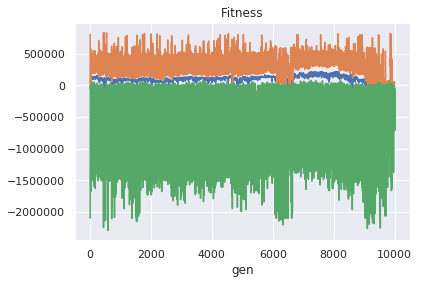

8000


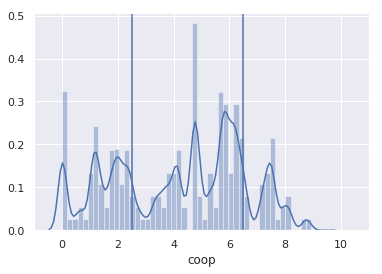

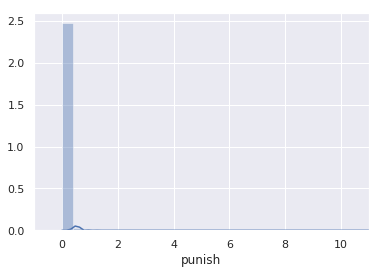

/home/pecoffet/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/pecoffet/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pecoffet/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


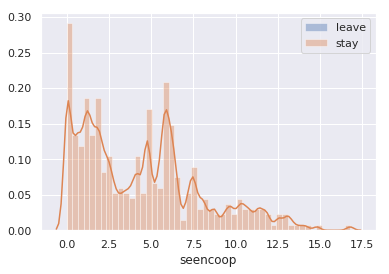

In [25]:
paths = '/data/logs/ccp/control-2018-11-06-1656/*/'
#paths = '/home/pecoffet/Documents/work/controlchoicepunish/juliatest/'
paths = '/home/pecoffet/Documents/work/controlchoicepunish/'
for path in sorted(glob.iglob(paths)):
    fitpath = path + '/fitnesslog.txt'
    print(fitpath)
    !zcat {fitpath+".gz"} > {fitpath} 2> /dev/null
    fit = pd.read_csv(fitpath, skipinitialspace=True, names=['gen', 'agent', 'fitness'])
    fit.groupby('gen')['fitness'].median().plot(label="median")
    fit.groupby('gen')['fitness'].max().plot(label="max")
    fit.groupby('gen')['fitness'].min().plot(label="min")
    plt.title("Fitness")
    plt.show()
    
    for i in [8000]:
        print(i)
        data = pd.read_csv(path+f'/jrunlog_{i}.txt.gz', skipinitialspace=True)
        sns.distplot(data.query(f'coef == 1 and leave < 0')['coop'])
        plt.axvline(2.5)
        plt.axvline(6.5)
        plt.xlim(-1, 11)
        plt.show()
        sns.distplot(data.query(f'coef == 1 and leave < 0')['punish'])
        plt.xlim(-1, 11)
        plt.show()
        sns.distplot(data.query('leave > 0 and newpartner == False')['seencoop'], label='leave')
        sns.distplot(data.query('leave < 0 and newpartner == False')['seencoop'], label='stay')
        plt.legend()
        plt.show()


/data/logs/ccp/nothing-2018-10-30-1621/run_02//fitnesslog.txt


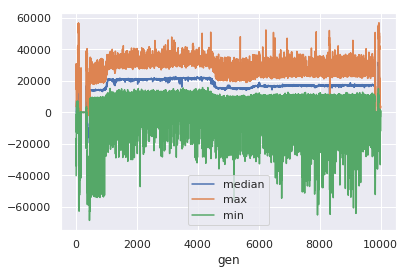

10000


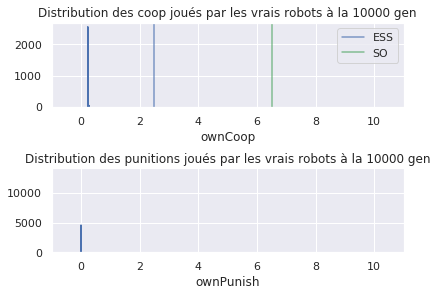

/home/pecoffet/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/pecoffet/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/pecoffet/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


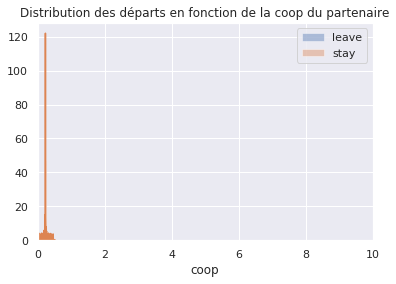

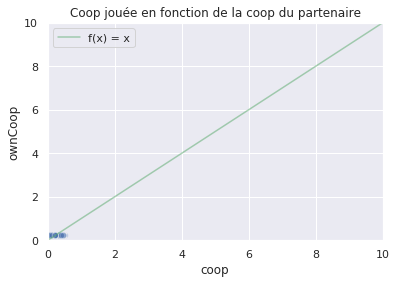

/data/logs/ccp/nothing-2018-10-30-1621/run_14//fitnesslog.txt


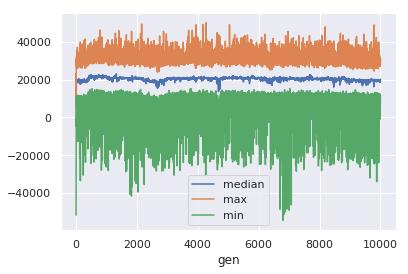

10000


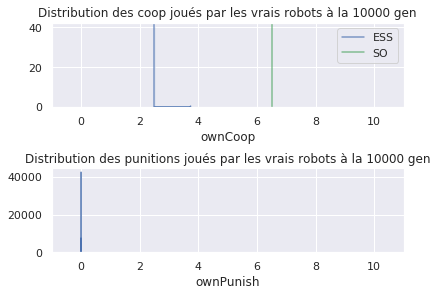

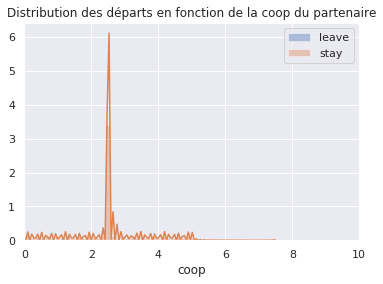

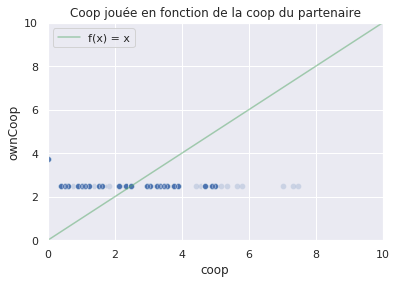

/data/logs/ccp/nothing-2018-10-30-1621/run_15//fitnesslog.txt


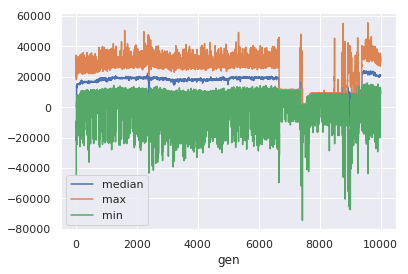

10000


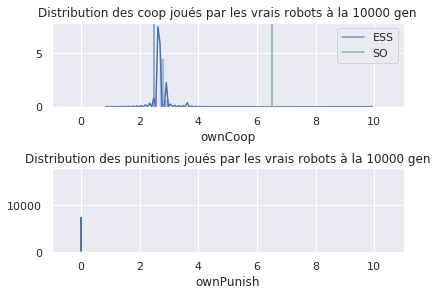

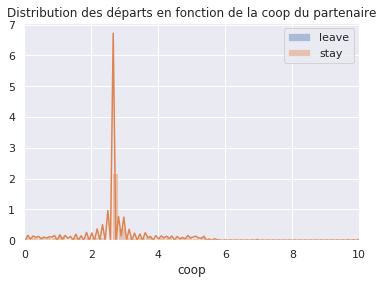

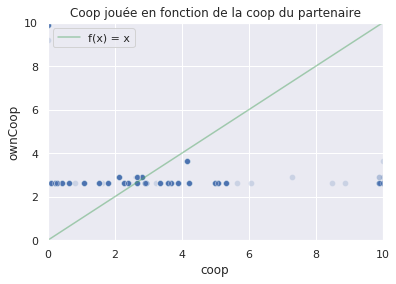

/data/logs/ccp/nothing-2018-10-30-1621/run_18//fitnesslog.txt


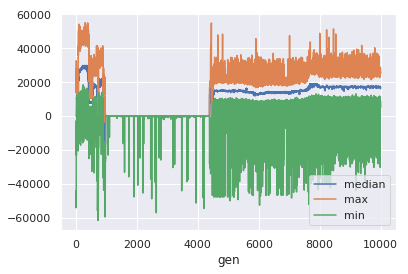

10000


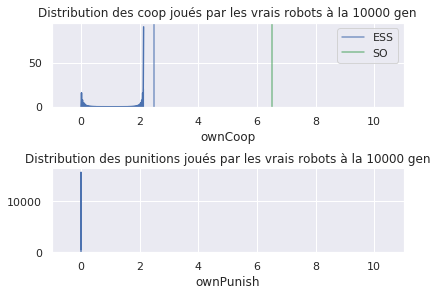

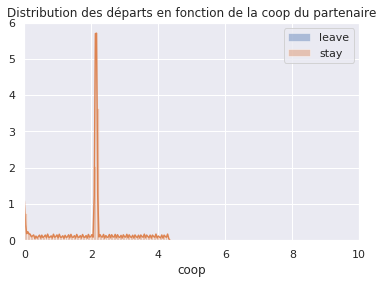

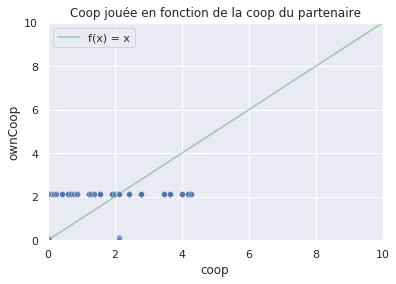

/data/logs/ccp/nothing-2018-10-30-1621/run_20//fitnesslog.txt


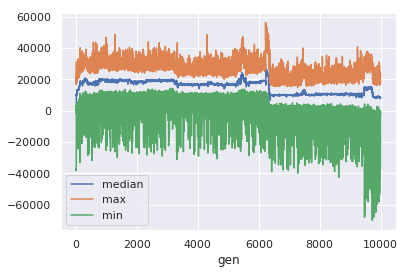

10000


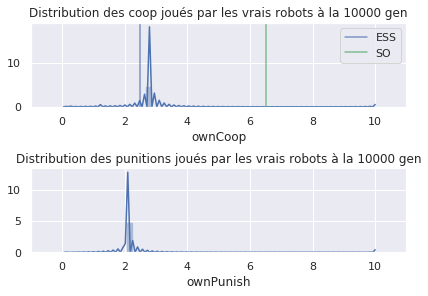

/home/pecoffet/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pecoffet/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


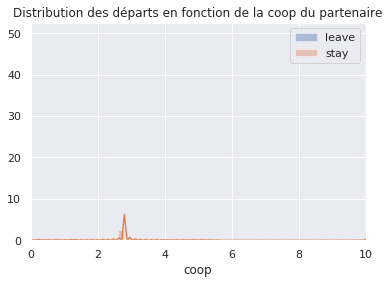

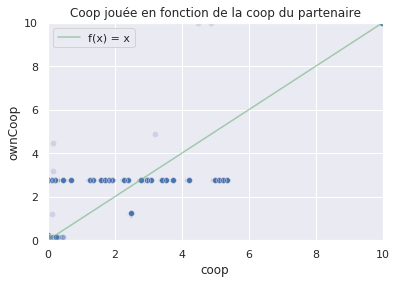

In [57]:
paths = '/data/logs/ccp/nothing-2018-10-30-1621/*/'
for path in sorted(np.random.choice(glob.glob(paths), size=5, replace=False)):
    fitpath = path + '/fitnesslog.txt'
    print(fitpath)
    !zcat {fitpath+".gz"} > {fitpath} 2> /dev/null
    fit = pd.read_csv(fitpath, skipinitialspace=True)
    fit.groupby('gen')['fitness'].median().plot(label="median")
    fit.groupby('gen')['fitness'].max().plot(label="max")
    fit.groupby('gen')['fitness'].min().plot(label="min")
    plt.legend()
    plt.show()
    
    for i in [10000]:
        print(i)
        data = pd.read_csv(path+f'/runlog_{i}.txt.gz', skipinitialspace=True)
        fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
        sns.distplot(data.query(f'fake == False and leave == False')['ownCoop'], ax=ax1)
        ax1.axvline(2.5, label="ESS", c="b", alpha=0.7)
        ax1.axvline(6.5, label="SO", c="g", alpha=0.7)
        ax1.legend()
        ax1.set_xlim(-1, 11)
        ax1.set_title(f"Distribution des coop joués par les vrais robots à la {i} gen")

        sns.distplot(data.query(f'fake == False and leave == False')['ownPunish'], ax=ax2)
        ax2.set_title(f"Distribution des punitions joués par les vrais robots à la {i} gen")
        ax2.set_xlim(-1, 11)
        plt.show()
        sns.distplot(data.query('leave == True')['coop'], label='leave')
        sns.distplot(data.query('leave == False')['coop'], label='stay')
        plt.title(f"Distribution des départs en fonction de la coop du partenaire")
        plt.xlim(0, 10)
        plt.legend()
        plt.show()
        sns.scatterplot(data=data.query('fake == False and leave==False and run == 1'), x='coop', y='ownCoop', alpha=0.2)
        plt.title(f"Coop jouée en fonction de la coop du partenaire")
        plt.plot([0, 10], [0, 10], c='g', alpha=0.5, label='f(x) = x')
        plt.legend()
        plt.ylim(0, 10)
        plt.xlim(0, 10)
        plt.show()


In [41]:
import numpy as np

In [3]:
def payoff(agent, pair):
    global a, b
    n = 2
    x = agent
    x0 = pair
    res = (a * (x + x0) + b * x0) / n - 1/2*x*x
    # print(f"p({x}, {x0}, {n}) = {res}")
    return res

(0, 22.930593816957455)

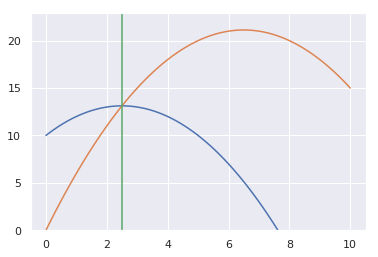

In [4]:
a = 5
b = 3
x = np.linspace(0, 10, 100)
plt.plot(x, payoff(x, 2.5))
plt.plot(x, payoff(x, x))
plt.axvline(2.5, c='g')
plt.ylim(0, None)

In [5]:
sns.distplot(a.query('leave == True')['coop'], label='leave')
sns.distplot(a.query('leave == False')['coop'], label='stay')
plt.legend()

AttributeError: 'int' object has no attribute 'query'

In [12]:
data = pd.read_csv(path+f'/jrunlog_1000.txt.gz', skipinitialspace=True)

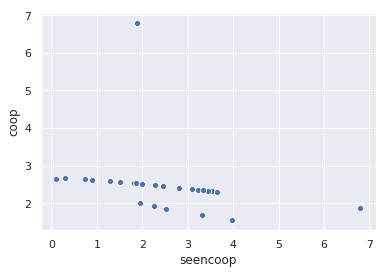

In [21]:
sns.scatterplot(data=data.query('coef == 1')[10000:60000], x='seencoop', y='coop')